# EP2 - Modelando o SARS-CoV-2

$[x]$ Parte 1 $[ ]$ Parte 2 $[ ]$ Relatório $[ ]$ Extra + CSV?

Mudar primeiro teste para o da figura 10 do sonnino

Hello, little fellows.

In [179]:
import math                          # exp(), ...
import matplotlib.pyplot as pyplot   # plot(), ...
import numpy                         # ones(), ...
import random                        # geração de números aleatórios

# Animação
from matplotlib import animation, rc
from IPython.display import HTML
import requests
import os
from io import BytesIO

Neste EP você vai simular o modelo dinâmico do COVID-19 resolvendo numericamente, por
Euler, a eq. 4 para algumas situações diferentes ligadas aos parâmetros $\alpha, \lambda,$ A e $t_0$.

$\frac{dN}{dt} = \alpha \bigg(1 - \frac{N}{\eta t^2} \bigg)N - \bigg(\frac{2\lambda t^2 - 1}{t} - \frac{\lambda (t_0)^2}{t} e^{-\lambda (t-t_0)^2}\bigg)N$

sendo $\alpha > 0$ o fator de crescimento, $t_0$ o tempo inicial que depende de medidas de restrição, $\lambda = \sigma^{-1}$ e $\eta = 2A/t_0$, onde A é um parâmetro que depende do vírus e das medidas de restrição. O parâmetro $\eta$ foi usado em substitução do A.

## Método de Euler

Dado o enunciado, a função que nos interessa recebe como parâmetros {$\alpha, \lambda, t_0, A$} (neste caso, em vez de A recebo $\eta$). Sua evolução deve ser modelada a partir do método de Euler, por meio do qual se realiza uma aproximação da equação diferencial a partir de diferenças finitas:

$$\frac{dN}{dt} =  \frac{N_{t+1} - N_{t}}{dt} \rightarrow N_{t+1} = N_t + \bigg[\alpha \bigg(1 - \frac{N}{\eta t^2} \bigg)N - \bigg(\frac{2\lambda t^2 - 1}{t} - \frac{\lambda (t_0)^2}{t} e^{-\lambda (t-t_0)^2}\bigg)N \bigg]dt $$

seja $N = N_t$, temos

$$N_{t+1} = N_t + \bigg[\alpha \bigg(1 - \frac{N_t}{\eta t^2} \bigg)N_t - \bigg(\frac{2\lambda t^2 - 1}{t} - \frac{\lambda (t_0)^2}{t} e^{-\lambda (t-t_0)^2}\bigg)N_t \bigg]dt \\ $$

que é o número de pessoas infectadas para um tempo $t$.

In [180]:
# N é o número de pessoas infectadas num certo tempo t

def nextN(N_0, dt, alfa, lamb, t0, eta, t):
    #eta = (2*A)/t0
    #print(eta)
    
    N  = alfa*(1-N_0/(eta*t**2))
    aux = ((2*lamb*t**2 -1)-(lamb*t0**2)*(math.exp(-lamb*(t-t0)**2)))/t
    #print(aux)
    N -= aux
    N *= N_0
    
    # Euler
    N *= dt
    N += N_0
    
    return N

## Parte 1
$-----------------------------------------------------------$

1. Assumindo que estamos numa ilha isolada, simule a evolução de N para um conjunto {$\alpha, \lambda$, A, $t_0$}. Nesse caso, o vetor de estados é unidimensional v(t) = \[N\](t). Faça um gráfico bonito para mostrar a evolução de v em relação a t, i.e. v(t). Faça também uma simulação dinâmica usando os recursos explicados em aula.

### Simulação 

In [181]:
# Retorna o vetor de estados

def sim():
    # Alguns dos dados abaixo foram retirados do 
    # documento do Sonino para o caso da Itália (p. 12)
    # https://arxiv.org/pdf/2003.13540v5.pdf
    # A maioria é aleatória tho
    
    N_0 = 1             # 165155 - número de casos inicial
    dt = 1              # passo = 1 dia
    t0 = 70.6           # 40 - parâmetro relativo ao pico da curva?
    lamb = 0.0014       # 0.001 - para uma simulação decente, tive que usar na ordem de 10^{-3}
    alfa = 2*t0*lamb    # 0.2 - do pdf do Sonnino, alfa = 2t0*lamb
    #A = 100            # 302.5 - 100 - não muda mt coisa
    eta = 60.5
    
    t = 1
    N = N_0
    v = []
    #t_f = 100
    
    while(N >= 1): #t <= t_f and
        v.append(int(N))
        t += dt
        N = nextN(N, dt, alfa, lamb, t0, eta, t)
        
    #print(v)
    return v

### Simulação em Gráfico:

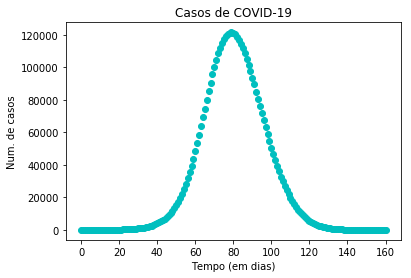

In [182]:
def simPlot(v):
    pyplot.figure()
    pyplot.plot(v,linestyle='',marker='o',color='c')
    pyplot.title('Casos de COVID-19')
    pyplot.ylabel('Num. de casos')
    pyplot.xlabel('Tempo (em dias)')
    pyplot.show()    

simPlot(sim())

### Simulação Dinâmica:

In [ ]:
def init_animate():
    line.set_data([], [])
    return (line,)

def animate(i):
    ind0 = i%len(yAnim)
    ind1 = (i+1)%len(yAnim)
    ind1 = ind0
    line.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    #ind = i%len(yAnim)
    #line.set_data(xAnim[ind], yAnim[ind]
    return (line,)

def createAnimPlot(title):
    figAnim, axAnim = pyplot.subplots(1, 1)
    axAnim = pyplot.axes(xlim=(-5, 165), ylim=(-100, 130000))
    # obs: o eixo muda se mudar os parâmetros de entrada
    
    pyplot.title(title)
    
    line, = axAnim.plot([], [], 'r-*', lw=5, color='c')
    frames=len(yAnim)-1
    
    return(figAnim, axAnim, frames, line)

t = 1
tempo = []
v = sim()
t_f = len(v)

while(t <= t_f):
    tempo.append(t)
    t += 1

#print(v)
#print(tempo)

yAnim = v
xAnim = tempo
figAnim, axAnim, frames, line = createAnimPlot('Casos de COVID-19 ao longo do tempo')
anim = animation.FuncAnimation(figAnim, animate, init_func=init_animate, frames=frames, interval=50, blit=True)
rc('animation', html='jshtml')
pyplot.ylabel('Num. de casos')
pyplot.xlabel('Tempo (em dias)')
pyplot.close()

anim

## Parte 2
$-----------------------------------------------------------$

2. Agora, com sua experiência anterior, simule para cinco ilhas diferentes sorteando os valores de {$\alpha, \lambda$, A, $t_0$}. Nesse caso, o vetor de estados é 5-dimensional v(t) = \[$N_0, N_1, N_2, N_3, N_4$\](t). Faça gráficos bonitos para mostrar a evolução de v em relação a t, i.e. v(t) para as diferentes ilhas. Assim, os gráficos irão mostrar a evolução de $N_i$, onde onde i é um rótulos para cada ilha, em relação a t. Crie igualmente um gráfico mostrando a evolução do módulo de v(t), i.e. $||v(t)||$. Plote também os produtos cartesianos das coordenadas do vetor de estados, i.e. $N_0xN_1, N_0xN_2$, etc., de maneira similar aos gráficos de borboleta das equações de Lorenz. Faça também uma simulação dinâmica usando os recursos explicados em aula.

Visto que $\alpha$ é dependente de $\lambda$ e de $t_0$, os parâmetros sorteados aleatóriamente serão $\lambda, t_0, A$. 

### Simulação

In [ ]:
# Retorna o vetor de estados de 4 dimensões

def sim_mult():
    random.seed(100)
    i = 0
    
    N_0 = []
    N_1 = []
    N_2 = []
    N_3 = []
    N_4 = []
    
    for i in range(0, 5): # vai de 0 a 4
        
        if(i == 0):
            aux = N_0
        elif(i == 1):
            aux = N_1
        elif(i == 2):
            aux = N_2
        elif(i == 3):
            aux = N_3
        else:
            aux = N_4
        
        #lux = 0.0043, ita = 0.0014, bel = 0.0025
        #antes = 0.001 - 0.009
        random_num = random.uniform(0.001, 0.005) 
        lamb = random_num   # para uma simulação decente, tive que usar na ordem de 10^{-3}
        
        #lux = 38.5, ita = 70.6, bel = 48.8
        # antes = 1 - 100
        random_num = random.uniform(30, 90)
        t0 = random_num     # parâmetro relativo ao pico da curva?
        
        #A = (eta*t0)/2
        #lux = 82.775, ita = 2135.65, bel = 719.8
        # antes = 1 - 999
        random_num = random.uniform(600, 2500)
        A = random_num      # não muda mt coisa
        
        #lux = 4.3, ita = 60.5, bel = 29.5
        #eta = 2A/t0
        
        #lux = 0.33, alfa = 0.2, bel = 0.24
        alfa = 2*t0*lamb    # do PDF do Sonnino
        #print(alfa)

        init_N = 1          
        dt = 1
        t = 1
        N = init_N
        #v = []
        t_f = 100

        while(t <= t_f): #and N >= 1
            aux.append(int(N))
            t += dt
            N = nextN(N, dt, alfa, lamb, t0, A, t)
            if(N < 0):
                N = 0
    
    # Concatenar em v
    v = (N_0, N_1, N_2, N_3, N_4)
        
    #print(v)
    return v

### Simulação em gráfico em relação a t:

In [ ]:
def simPlot_mult(v):
    pyplot.figure(0, figsize=(13,10))
    # mudar o tamanho dos blocos ^
        
    pyplot.subplot(2,2,1)
    pyplot.plot(v[0],linestyle='',marker='o',color='r')
    pyplot.title('Casos de COVID-19 - Ilha 0')
    pyplot.ylabel('Num. de casos, $N_0$')
    pyplot.xlabel('Tempo (em dias)')

    pyplot.subplot(2,2,2)
    pyplot.plot(v[1],linestyle='',marker='o',color='m')
    pyplot.title('Casos de COVID-19 - Ilha 1')
    pyplot.ylabel('Num. de casos, $N_1$')
    pyplot.xlabel('Tempo (em dias)')
    
    
    pyplot.subplot(2,2,3)
    pyplot.plot(v[2],linestyle='',marker='o',color='c')
    pyplot.title('Casos de COVID-19 - Ilha 2')
    pyplot.ylabel('Num. de casos, $N_2$')
    pyplot.xlabel('Tempo (em dias)')
    
    pyplot.subplot(2,2,4)
    pyplot.plot(v[3],linestyle='',marker='o',color='g')
    pyplot.title('Casos de COVID-19 - Ilha 3')
    pyplot.ylabel('Num. de casos, $N_3$')
    pyplot.xlabel('Tempo (em dias)')
    
    pyplot.figure(1, figsize=(6.5,5))
    pyplot.plot(v[4],linestyle='',marker='o',color='b')
    pyplot.title('Casos de COVID-19 - Ilha 4')
    pyplot.ylabel('Num. de casos, $N_4$')
    pyplot.xlabel('Tempo (em dias)')
        
    #pyplot.show()
    #print(v)

simPlot_mult(sim_mult())

### Simulação em gráfico em relação a $||v(t)||$:

É pedida a norma do vetor de estados, portanto, temos

$$||v(t)|| = \sqrt{(N_0(t))^2 + (N_1(t))^2 + (N_2(t))^2 + (N_3(t))^2 + (N_4(t))^2}$$

para cada t analisado.

In [ ]:
# Recebe um vetor de estados v, mostra o gráfico da norma

def simMod(v):
    N_size = len(v[0])
    i = total = 0
    mod = []
    
    for i in range (0, N_size):
        total = math.sqrt((v[0][i])**2 + (v[1][i])**2 + (v[2][i])**2 + (v[3][i])**2 + (v[4][i])**2)
        mod.append(total)
        
    
    pyplot.figure()
    pyplot.plot(mod,linestyle='',marker='*',color='c')
    pyplot.title('Modulo do vetor de estados')
    pyplot.ylabel('||v(t)||')
    pyplot.xlabel('t')
    pyplot.show()

simMod(sim_mult())

### Simulação em produto cartesiano:

Abaixo, encontram-se os produtos cartesianos das coordenadas do vetor de estados. Assim, temos a representação de $N_ixN_j$, sendo $i \neq j$, assumindo valores $[0,1,2,3,4]$.

In [ ]:
def sim_cart(v,case,ilha):
    i = 1;
    title = ''

    pyplot.figure(0, figsize=(13,10))
    pyplot.subplots_adjust(wspace=0.3, hspace=0.3)

    if(case != 0):
        title = 'N'
        title += str(case)
        title += 'xN0'
        pyplot.subplot(2,2,i)
        pyplot.plot(v[case], v[0], color='c')
        pyplot.title(title)
        pyplot.ylabel('$Ilha_0$')
        pyplot.xlabel(ilha)
        ax = pyplot.gca()
        pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        i += 1
    
    if(case != 1):
        title = 'N'
        title += str(case)
        title += 'xN1'
        pyplot.subplot(2,2,i)
        pyplot.plot(v[case], v[1], color='c')
        pyplot.title(title)
        pyplot.ylabel('$Ilha_1$')
        pyplot.xlabel(ilha)
        ax = pyplot.gca()
        pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        i += 1

    if(case != 2):
        title = 'N'
        title += str(case)
        title += 'xN2'
        pyplot.subplot(2,2,i)
        pyplot.plot(v[case], v[2],color='c')
        pyplot.title(title)
        pyplot.ylabel('$Ilha_2$')
        pyplot.xlabel(ilha)
        ax = pyplot.gca()
        pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        i += 1

    if(case != 3):
        title = 'N'
        title += str(case)
        title += 'xN3'
        pyplot.subplot(2,2,i)
        pyplot.plot(v[case], v[3], color='c')
        pyplot.title(title)
        pyplot.ylabel('$Ilha_3$')
        ax = pyplot.gca()
        pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
        pyplot.xlabel(ilha)
        i += 1

    if(case != 4):
        title = 'N'
        title += str(case)
        title += 'xN4'
        pyplot.subplot(2,2,i)
        pyplot.plot(v[case], v[4], color='c')
        pyplot.title(title)
        pyplot.ylabel('$Ilha_4$')
        pyplot.xlabel(ilha)
        ax = pyplot.gca()
        pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [ ]:
sim_cart(sim_mult(), 0, '$Ilha_0$')

In [ ]:
sim_cart(sim_mult(), 1, '$Ilha_1$')

In [ ]:
sim_cart(sim_mult(), 2, '$Ilha_2$')

In [ ]:
sim_cart(sim_mult(), 0, '$Ilha_3$')

In [ ]:
sim_cart(sim_mult(), 4, '$Ilha_4$')